In [1]:
!pip3 install gymnasium[classic_control]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 16.1 MB/s eta 0:00:00


In [2]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
import matplotlib.pyplot as plt

In [3]:
#Hyperparameters
learning_rate = 0.0002
gamma         = 0.98

In [4]:
class Policy(nn.Module):
    def __init__(self):
        super(Policy, self).__init__()
        self.data = []

        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 2)
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=0)
        return x

    def put_data(self, item):
        self.data.append(item)

    def train_net(self):
        R = 0
        self.optimizer.zero_grad()
        for r, prob in self.data[::-1]:
            R = r + gamma * R
            loss = -torch.log(prob) * R
            loss.backward()
        self.optimizer.step()
        self.data = []

In [7]:
def main():
    env = gym.make('CartPole-v1')
    pi = Policy()
    avg_scores = []
    score = 0.0
    print_interval = 20
    best_score = -float('inf')


    for n_epi in range(10000):
        s, _ = env.reset()
        done = False
        truncated = False

        while not (done or truncated): # CartPole-v1 forced to terminates at 500 step.
            prob = pi(torch.from_numpy(s).float())
            m = Categorical(prob)
            a = m.sample()
            s_prime, r, done, truncated, info = env.step(a.item())
            pi.put_data((r,prob[a]))
            s = s_prime
            score += r

        pi.train_net()

        if score >= best_score:
          best_score = score
          torch.save(pi.state_dict(), f"reinforce_cartpole{n_epi}_.pth")
          print(f"New best score: {best_score}. Model saved.")

        if n_epi%print_interval==0 and n_epi!=0:
            avg_score = score / print_interval
            avg_scores.append(avg_score)  # 평균 점수 저장
            print("# of episode :{}, avg score : {}".format(n_epi, score/print_interval))
            score = 0.0

    env.close()
    plt.plot(avg_scores)
    plt.xlabel('Episodes (x20)')
    plt.ylabel('Average Score')
    plt.title('Average Score vs Episodes')
    plt.show()

New best score: 12.0. Model saved.
New best score: 23.0. Model saved.
New best score: 34.0. Model saved.
New best score: 59.0. Model saved.
New best score: 72.0. Model saved.
New best score: 100.0. Model saved.
New best score: 116.0. Model saved.
New best score: 131.0. Model saved.
New best score: 150.0. Model saved.
New best score: 166.0. Model saved.
New best score: 175.0. Model saved.
New best score: 193.0. Model saved.
New best score: 208.0. Model saved.
New best score: 238.0. Model saved.
New best score: 253.0. Model saved.
New best score: 277.0. Model saved.
New best score: 288.0. Model saved.
New best score: 299.0. Model saved.
New best score: 314.0. Model saved.
New best score: 357.0. Model saved.
New best score: 373.0. Model saved.
# of episode :20, avg score : 18.65
New best score: 403.0. Model saved.
# of episode :40, avg score : 20.15
New best score: 415.0. Model saved.
New best score: 442.0. Model saved.
New best score: 463.0. Model saved.
New best score: 491.0. Model save

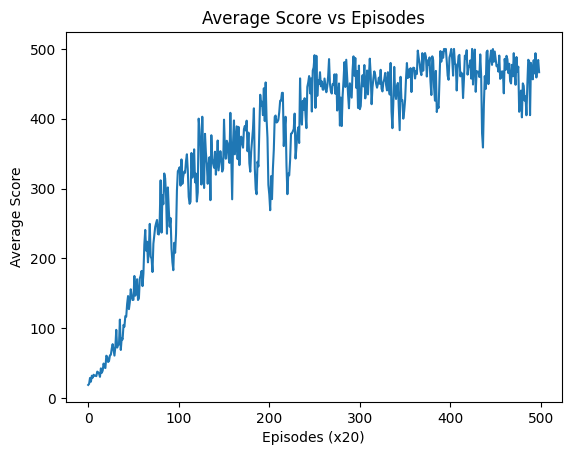

In [8]:
main()